In [1]:
#Correlation is defined as the statistical association between two variables.
#A relationship is linear when the points on a scatterplot follow a somewhat straight line pattern.
#Lets exmine through scatterplot the kind of relationship between CO(GT) and NOx(GT) for the given dataset.

In [1]:
#Import dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Create dataframe
df = pd.read_excel('/Users/bbaidya/q3/AirQuality.xlsx')
#Display & examine some data
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


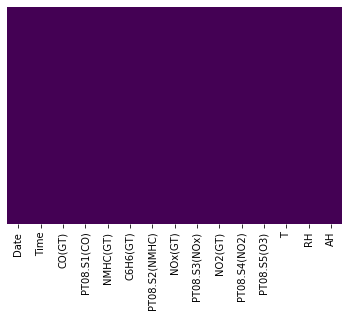

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

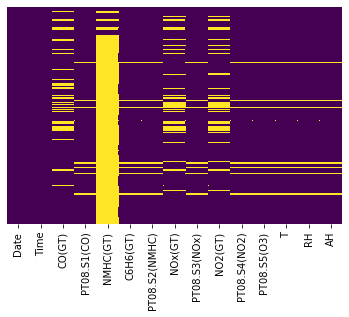

In [6]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.drop(['NMHC(GT)'], axis= 1, inplace= True)

(9357, 14)

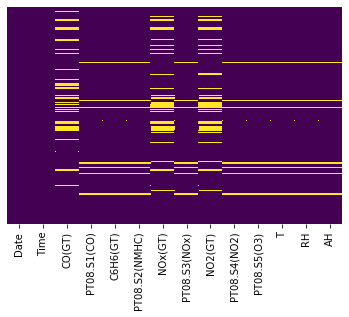

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.shape

In [9]:
df["CO(GT)"] = df.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NOx(GT)"] = df.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NO2(GT)"] = df.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

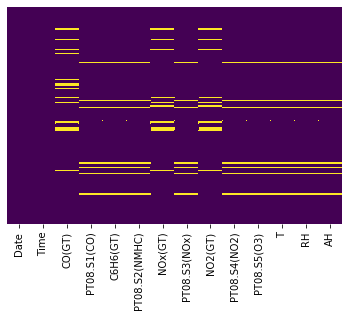

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.fillna(method='ffill', inplace= True)

In [12]:
df.isnull().any().any()

False

In [13]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.604396,10.190299,942.422741,239.406473,832.618539,109.369051,1452.890358,1030.388426,18.315768,48.814853,1.017382
std,1.383347,219.599578,7.565011,269.583076,200.825951,255.704654,46.047394,347.427351,410.906048,8.822898,17.354492,0.404829
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,938.250000,4.401596,732.500000,102.000000,654.500000,76.000000,1227.750000,726.000000,11.875000,35.425000,0.726213
50%,1.700000,1061.500000,8.276765,910.500000,176.521739,806.750000,103.600000,1459.750000,963.750000,17.575000,48.925001,0.987539
75%,2.700000,1237.250000,14.019301,1117.250000,316.000000,967.500000,135.000000,1676.750000,1286.500000,24.325000,61.875000,1.306671
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


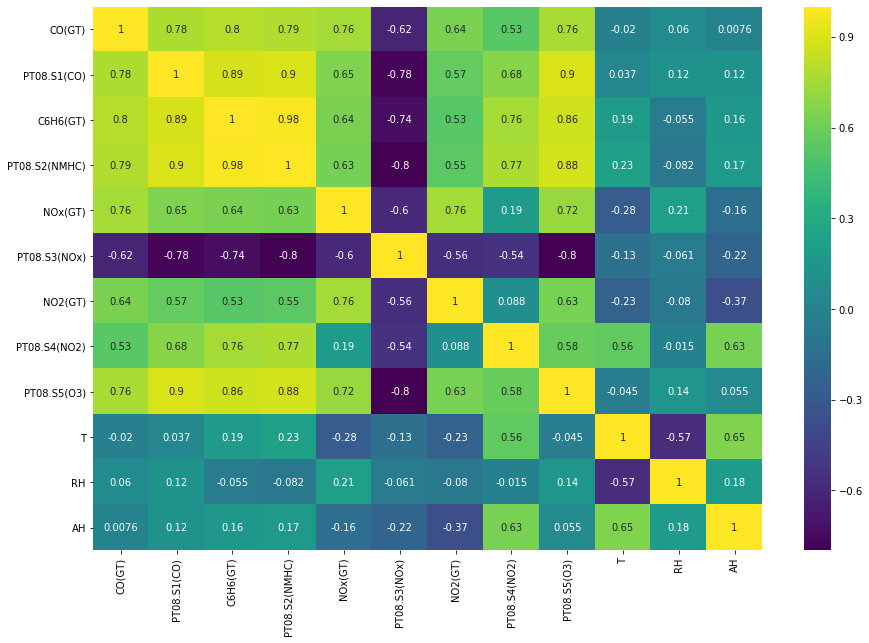

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [15]:
print(df.corr())

                 CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.781820  0.803293       0.788371  0.758914   
PT08.S1(CO)    0.781820     1.000000  0.886338       0.896033  0.651030   
C6H6(GT)       0.803293     0.886338  1.000000       0.982508  0.641125   
PT08.S2(NMHC)  0.788371     0.896033  0.982508       1.000000  0.625392   
NOx(GT)        0.758914     0.651030  0.641125       0.625392  1.000000   
PT08.S3(NOx)  -0.616418    -0.777878 -0.737670      -0.798090 -0.598563   
NO2(GT)        0.641666     0.569756  0.526192       0.548905  0.756122   
PT08.S4(NO2)   0.529621     0.676419  0.756338       0.769774  0.186677   
PT08.S5(O3)    0.761820     0.901469  0.861701       0.876614  0.722056   
T             -0.019943     0.037062  0.189655       0.231034 -0.275903   
RH             0.059608     0.120017 -0.054982      -0.082055  0.209769   
AH             0.007590     0.121736  0.155813       0.174906 -0.156283   

               PT08.S3(N

In [16]:
#As from the correlation heatmap or the values in the correlation matrix, we can see that there is a very significant 
#correlation between the gases among themselves. Also NOx(GT) and NO2(GT) are also highly correlated as expected, 
#because the NO2(GT) is a subset value of the NOx(GT) values. The temperature(T), RH and AH values show somewhat 
#significant correlation around 0.60 amongst themselves, but are very weakly correlated with the gas concentration 
#attributes.Hence in a model approximating the gas concentrations, T, RH or AH values might not contribute well in 
#the model estimation. The value of correlation in the correlation matrix above 0.6-0.7 is generally considered a 
#decent correlation. The correlations grater than 0.8 are good, and the ones with values grater than 0.9 are very 
#well corelated.

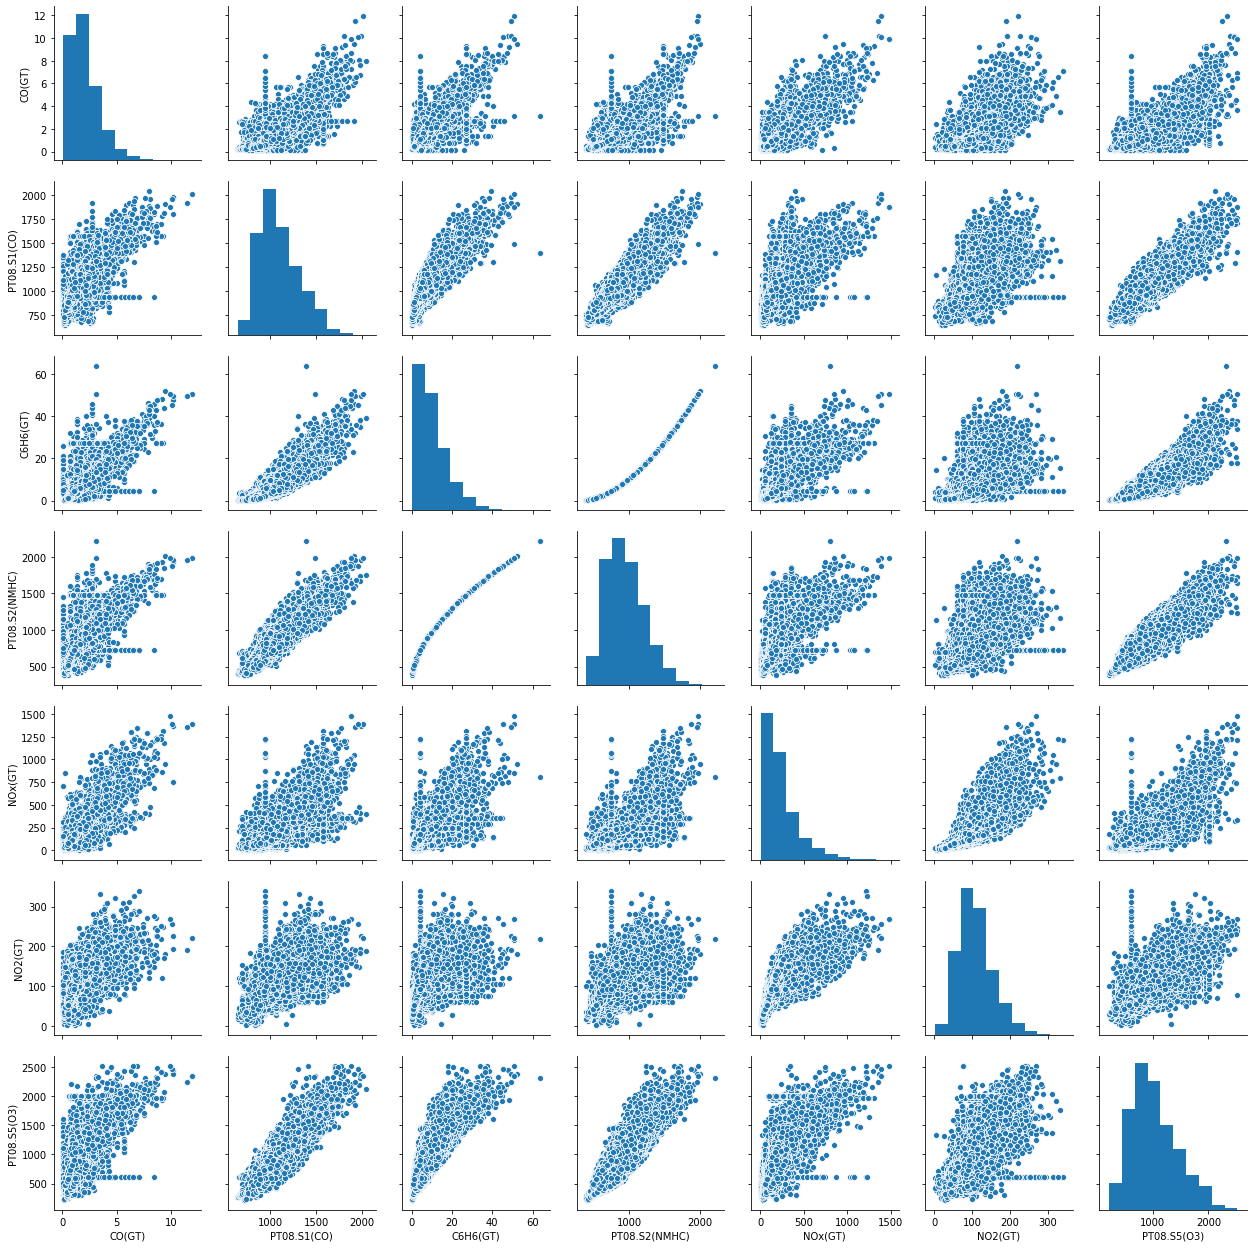

In [17]:
sns.pairplot(df, vars=["CO(GT)", "PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)", "NO2(GT)", "PT08.S5(O3)"])

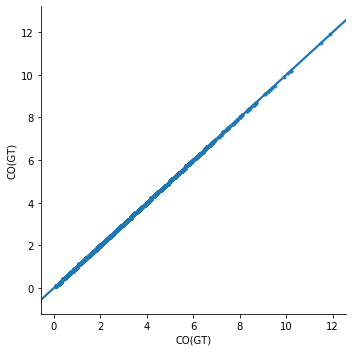

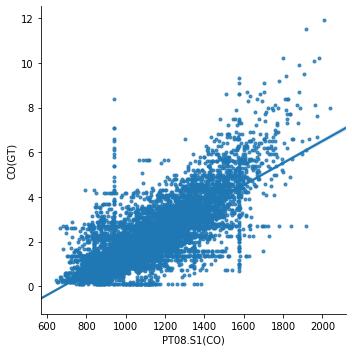

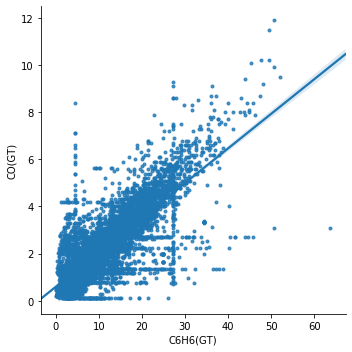

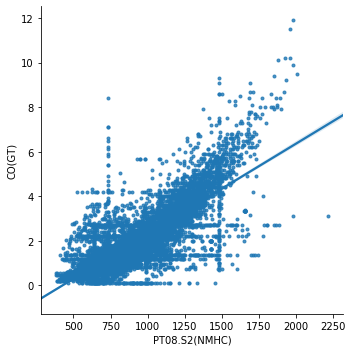

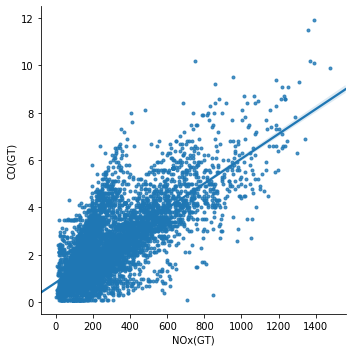

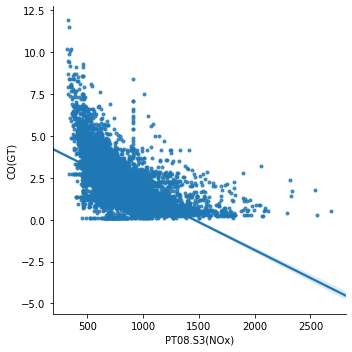

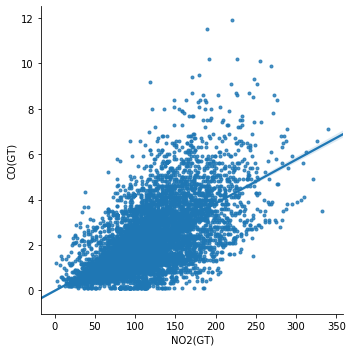

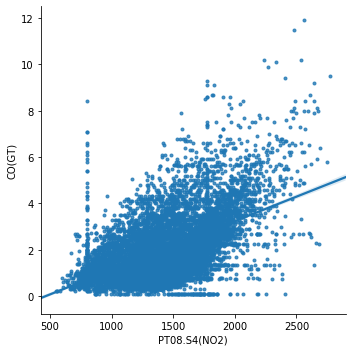

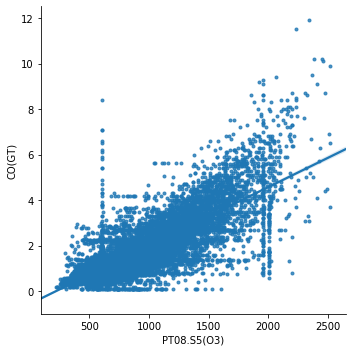

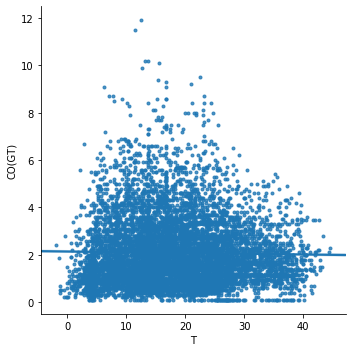

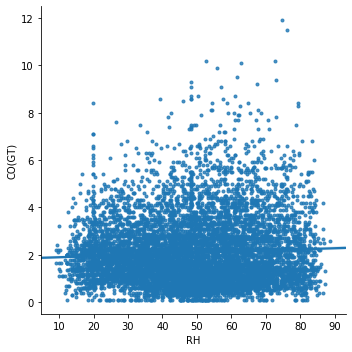

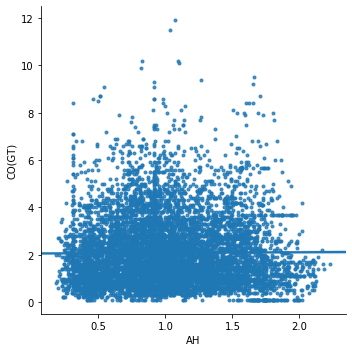

In [18]:
#plot all X-features against output variable RH
col_=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sns.lmplot(x=i,y="CO(GT)",data=df,markers='.')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa820ffb350>,
      dtype=object)

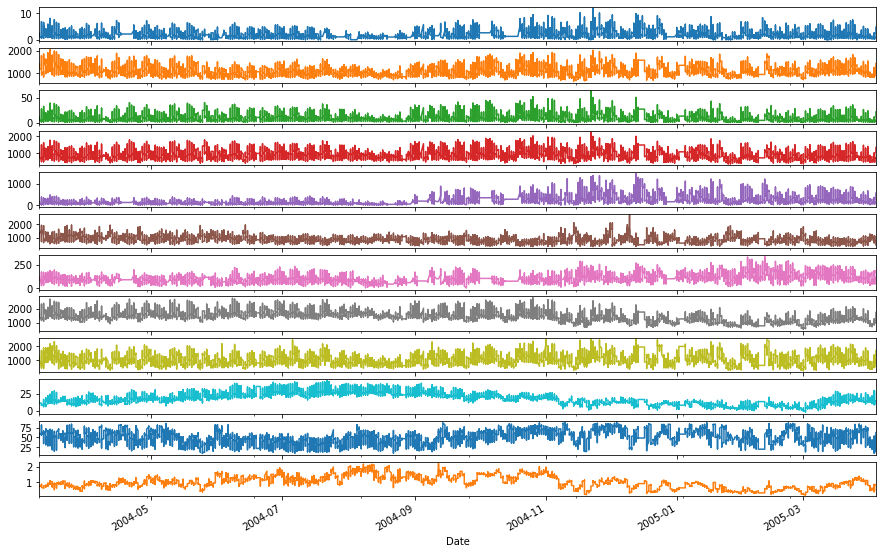

In [19]:
df.plot(x='Date',subplots=True, figsize=(15, 10),legend=False)

<Figure size 432x288 with 0 Axes>

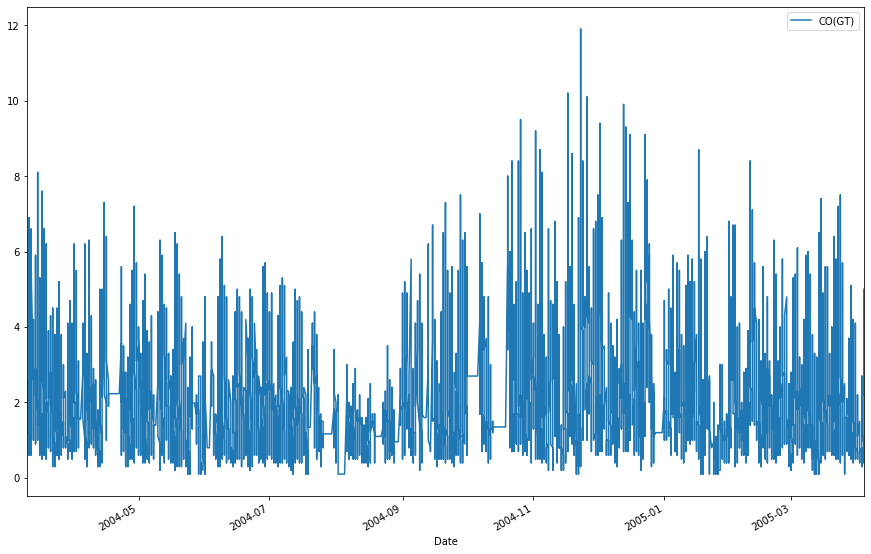

In [20]:

plt.figure(); df.plot(x='Date',y='CO(GT)',figsize=(15, 10)); plt.legend(loc='best')

In [21]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [22]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [23]:
X=df[['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
y=df[['CO(GT)']]

In [24]:
ss=StandardScaler()
X_std=ss.fit_transform(X) 

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6549, 8)
Test data size: (2808, 8)


In [26]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train) 

In [27]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: [2.0805363]
--------------------------------
Slope:


[('PT08.S1(CO)',
  array([ 0.30013521,  0.47366034, -0.15451798,  0.58935959,  0.17055821,
          0.24945285,  0.30528761, -0.11866302]))]

In [28]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 0.6690926852232368


In [29]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=df[feature]
    y=df['CO(GT)']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [30]:
print('List of features:',col_)
col_.remove('CO(GT)')
#print('List of features:',col_) 

List of features: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [31]:
print('RMSE with Features as',col_[0:1],train_test_RMSE(col_[0:1]))
print('-------------------------')
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:3],train_test_RMSE(col_[0:3]))
print('-------------------------')
print('RMSE with Features as',col_[0:4],train_test_RMSE(col_[0:4]))
print('-------------------------')
print('RMSE with Features as',col_[0:5],train_test_RMSE(col_[0:5]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:7],train_test_RMSE(col_[0:7]))
print('RMSE with Features as',col_[0:8],train_test_RMSE(col_[0:8]))

RMSE with Features as ['PT08.S1(CO)'] 0.8817456882779047
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)'] 0.8053876315462454
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)'] 0.8016933610147053
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)'] 0.7058530479225431
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)'] 0.695573705288274
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)'] 0.6884949980810471
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)'] 0.6707106177946283
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'] 0.6690926852232368
